# <span style="color:blue"> NSL Exercise lesson 8. </span> 

## <span style="color:red"> Exercise 8.2. </span>

The first aim of this numerical exercise is to variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the  external potential

$$ V(x) = x^4 - \frac{5}{2}x^2 $$

This 1D quantum model is not analytically solvable, hence the variational approach followed during the simulation. In particular, in order to exploit this technique, one has to find the optimal parameters $\mu$ and $\sigma$ of the following trial function

$$ \Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}} $$

which represents an approximation of the ground state wave function.

More precisely, the parameters $\mu$ and $\sigma$ represent the best parameters that allow the system to minimize its energy, i.e.

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

where $E_{0}$ represents the real ground state energy.

The attached C++ code performed the optimization and gave back $\mu=0.81$ and $\sigma=0.62$  as best extimations. Then, these parameters were used to make $10^6$ estimations of $\langle {\hat H} \rangle_T$ and its uncertainty, both as function of $N=100$ blocks. Below, you can find all the requested plots and a comparison between the sampled wave function $|\Psi_T(x)|^2$, the analytic curve and the numerical solution of the ground state.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from math import pi

#Numerical Solution

def V(x):
      return (x**2 - 2.5)*x**2

N=1000
hbar = 1
m = 1

x = np.linspace(-3,3,N)
dx = x[1] - x[0]
V = V(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E, psi = np.linalg.eigh(H)
psi_2 = np.transpose(psi)
psi_2 /= np.sqrt(dx)

#Analytic curve

mu = 0.81             #These parameters are obtained from the 
sigma = 0.62          #optimization function in the attached C++ code
func = lambda x:(np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2         #Normalization
I = integrate.quad(func,-np.inf,+np.inf)                                                     #constant
prob_func = ((np.exp(-(x-mu)**2/(2*sigma**2))+np.exp(-(x+mu)**2/(2*sigma**2)))**2)/(I[0])

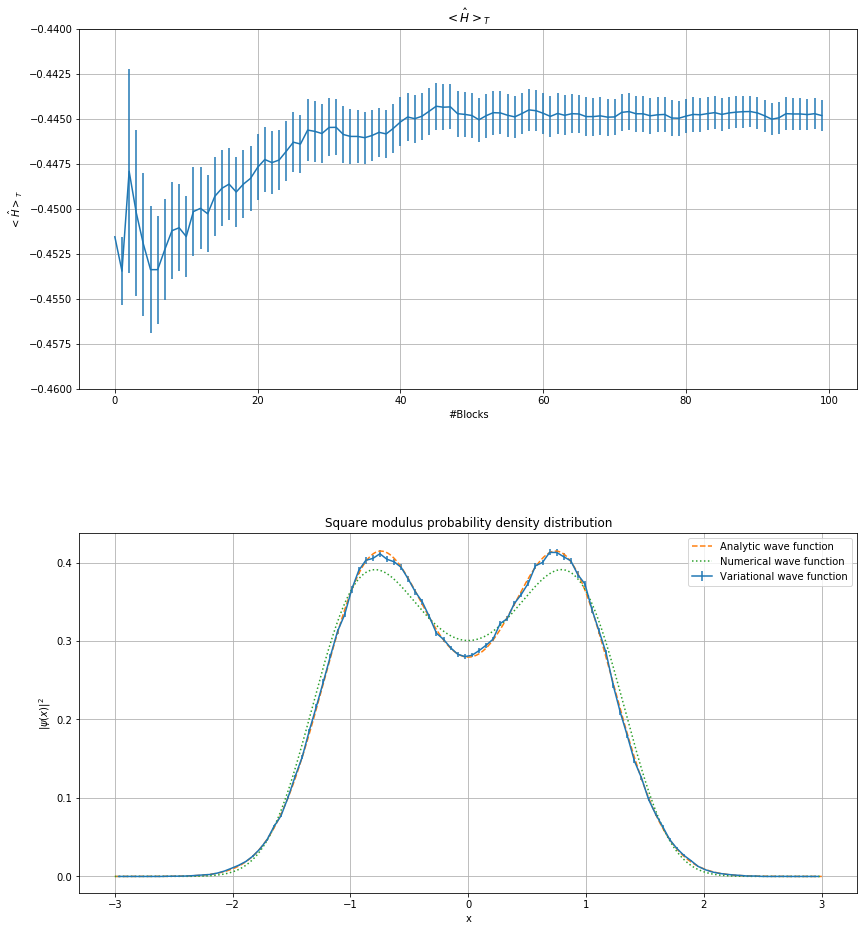

In [2]:
#Loading datas & plots
f, ax = plt.subplots(2)

xdat, H, err_H = np.loadtxt("Datas/hamiltonian.dat", usecols=(0,1,2), unpack='true')
ax[0].errorbar(xdat, H, yerr=err_H)
ax[0].set_title('$<{\hat H}>_T$')
ax[0].set(xlabel="#Blocks", ylabel='$<{\hat H}>_T$', ylim=(-0.46,-0.44))
ax[0].grid(True)

xdat, psi, err_psi = np.loadtxt("Datas/histogram.dat", usecols=(0,1,2), unpack='true')
ax[1].errorbar(xdat, psi, yerr=err_psi, label="Variational wave function")
ax[1].plot(x, prob_func, label="Analytic wave function", linestyle="dashed")
ax[1].plot(x, psi_2[0]**2, label="Numerical wave function", linestyle="dotted")
ax[1].set_title("Square modulus probability density distribution")
ax[1].set(xlabel="x", ylabel="$|\psi(x)|^2$")
ax[1].legend()
ax[1].grid(True)

plt.subplots_adjust(left=-0.5, bottom=-1., right=1.3, top=2., wspace=0.1, hspace=0.4)

plt.show()

## <span style="color:red"> Exercise 8.3. </span>

In this exercise it is required to perform simulations of the same quantum system described above this time using the provided PIMC/PIGS code. In particular, the results of the simulations of the square modulus of the probability wave function $|\psi(x)|^2$ describing the ground state of the system are obtained starting from:

- a constant trial wave function, $\Psi_T(x)=1$
- a wave function $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters obtained in the previous exercise, i.e. $\mu=0.81$ and $\sigma=0.62$

Below you can find the results of the simulations, whose other parameters are reported in file <font face="Courier">input.pigs</font>.  

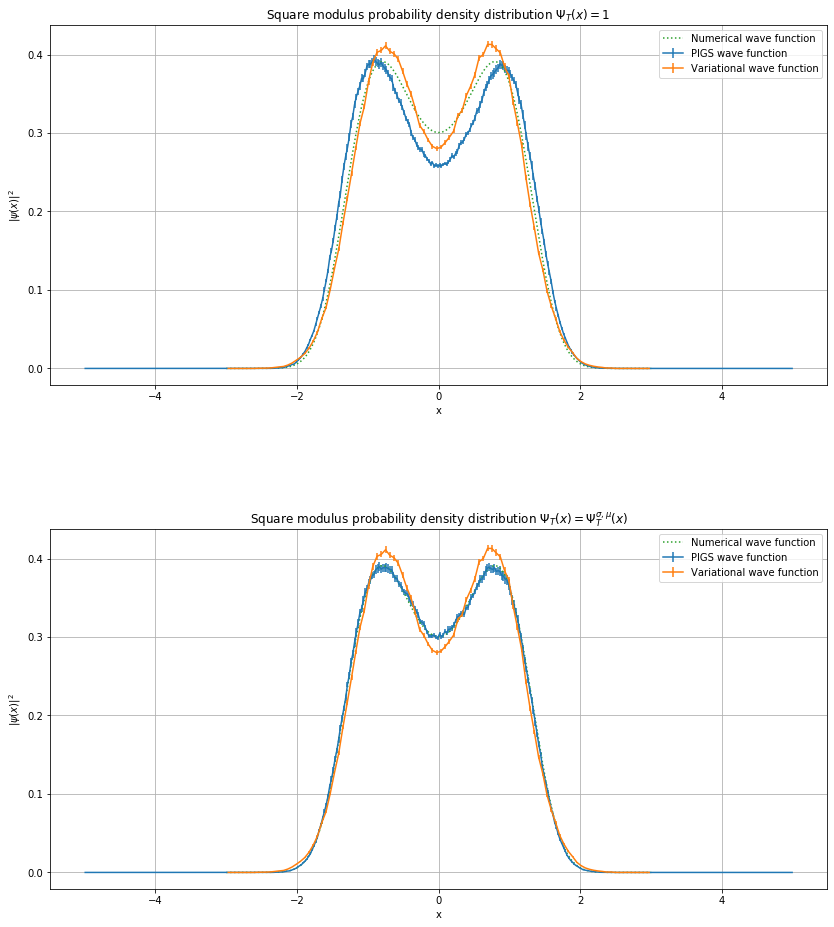

In [3]:
f, ax = plt.subplots(2)

#You can change path_to_file_probability_x.dat in order to show different 
#results  obtained for  imaginaryTimePropagation x = 1, 2, 4, 8

xbin, prob, err_prob = np.loadtxt("Datas/trial_1/probability_1.dat", usecols=(0,1,2), unpack='true')
ax[0].errorbar(xbin, prob, yerr=err_prob, label="PIGS wave function")
ax[0].errorbar(xdat, psi, yerr=err_psi, label="Variational wave function")
ax[0].plot(x, psi_2[0]**2, label="Numerical wave function", linestyle="dotted")
ax[0].set_title('Square modulus probability density distribution $\Psi_T(x) = 1 $')
ax[0].set(xlabel="x", ylabel='$|\psi(x)|^2$')
ax[0].legend()
ax[0].grid(True)

xbin2, prob2, err_prob2 = np.loadtxt("Datas/trial_sigmamu/probability_1.dat", usecols=(0,1,2), unpack='true')
ax[1].errorbar(xbin2, prob2, yerr=err_prob2, label="PIGS wave function")
ax[1].errorbar(xdat, psi, yerr=err_psi, label="Variational wave function")
ax[1].plot(x, psi_2[0]**2, label="Numerical wave function", linestyle="dotted")
ax[1].set_title("Square modulus probability density distribution $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$")
ax[1].set(xlabel="x", ylabel="$|\psi(x)|^2$")
ax[1].legend()
ax[1].grid(True)
plt.subplots_adjust(left=-0.5, bottom=-1, right=1.3, top=2, wspace=0.1, hspace=0.4)

plt.show()

The plots above represent $|\psi(x)|^2$ using an imaginary time propagation $\tau=1$ (the other cases are $\tau=2, 4, 8$). In general, you can notice that the PIGS code gives back a better extimation closer to the numerical wave function than the variational code written in exercise 8.1. Also, note that you can change the displayed results by changing the name of the file <font face="Courier">probability_x.dat</font> as commented in the script.

- How much can you reduce the imaginary time propagation with respect to the first case?

Using the provided data files you can see that using  $\Psi_T(x)=1$ as trial function the imaginary time propagation  can be reduced up to $\tau=2$. Using lower values leads the PIGS wave function to diverge from the numerical solution. On the other hand, using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ as trial function, it is possible to reduce $\tau$ up to 1 or lower values, obtaining good results nevertheless. 

This behaviours are actually expected. In fact, the trial function $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ starts closer to the 'real' wave function of the system than the trial function $\Psi_T(x)=1$. Therefore, it is natural that $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ converges faster than $\Psi_T(x)=1$, hence the possibility to reduce its imaginary time propagation to lower values.

Finally, using again the PIMC/PIGS code, the simulations are performed changing the temperature of the system ($T>0$) in order to observe how $|\psi(x)|^2$ varies. Below, you can find all the results.

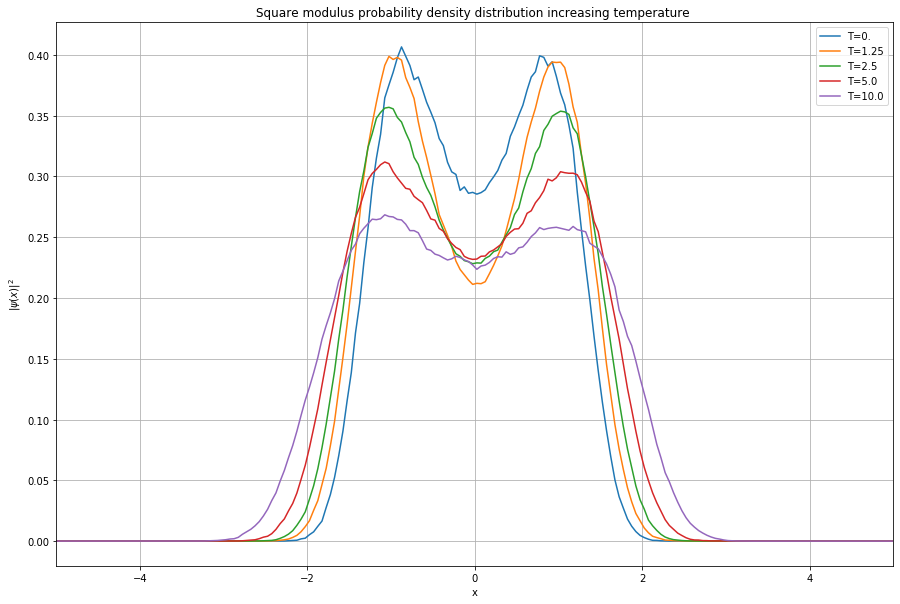

In [4]:
plt.figure(figsize = (15, 10))

x_0, y_0, yerr_0 = np.loadtxt("Datas/pimc_temp/probability_0.dat", unpack = True)
x_1_25, y_1_25, yerr_1_25 = np.loadtxt("Datas/pimc_temp/probability_1.25.dat", unpack = True)
x_2_5, y_2_5, yerr_2_5 = np.loadtxt("Datas/pimc_temp/probability_2.5.dat", unpack = True)
x_5, y_5, yerr_5 = np.loadtxt("Datas/pimc_temp/probability_5.dat", unpack = True)
x_10, y_10, yerr_10 = np.loadtxt("Datas/pimc_temp/probability_10.dat", unpack = True)

plt.plot(x_0, y_0, label="T=0.")
plt.plot(x_1_25, y_1_25, label="T=1.25")
plt.plot(x_2_5, y_2_5, label="T=2.5")
plt.plot(x_5, y_5, label="T=5.0")
plt.plot(x_10, y_10, label="T=10.0")
plt.xlim((-5, 5))
plt.title("Square modulus probability density distribution increasing temperature ")
plt.xlabel("x")
plt.ylabel(r"$|\psi(x)|^2$")
plt.grid(True)
plt.legend()

plt.show()

You can notice that, as the temperature of the system increases, the local minimum of $|\psi(x)|^2$ decreases while the tails get broader and broader. We can expect this behaviour, since a $T\neq0$ allows the excited states to 'unfreeze', giving a significant contribution to the total wave function of the system, which is now a superposition of different quantum states.